In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Dataset_AB_TEST .xlsx')
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [3]:
df1 = df.dropna()
df1


,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10840 non-null  int64  
 1   id_group    10840 non-null  object 
 2   sum_pay     10840 non-null  float64
 3   id_point    10840 non-null  float64
 4   months_reg  10840 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 508.1+ KB


In [5]:
q=[0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995]

In [6]:
def statistical_analysis(datas, quantilies):
  answer = ''
  if type(datas) in (tuple, list):
     answer += 'Нужен список или кортеж'
  else:
    if len(datas) <=4:
       answer += 'Требуется более длинный ряд'  
    else:
        answer += 'Данные корректны'
        datas = pd.Series(datas)
        avg_d = datas.mean()
        var_d = datas.var()
        std_d = datas.std()
        qs = np.quantile(datas,quantilies)
        qsr = qs[1:]/qs[:-1]
        v=0.0
        qsr = np.insert(qsr,0,v)
        dfq = pd.DataFrame(q, columns = ['quant_level'])
        dfq['quantile'] = qs
        dfq['ratio'] = qsr
    return print(answer,'Среднее значение:',  avg_d,'Дисперсия:',var_d,'Стандартное отклонение:',std_d,dfq), sns.histplot(datas) 
 
        
 

    
    

    
    
  



Данные корректны Среднее значение: 3568.7580258302582 Дисперсия: 8568932.941996625 Стандартное отклонение: 2927.27397795229     quant_level   quantile     ratio
0         0.010    121.000  0.000000
1         0.020    159.000  1.314050
2         0.030    191.000  1.201258
3         0.040    223.000  1.167539
4         0.050    252.000  1.130045
5         0.100    410.000  1.626984
6         0.250   1250.750  3.050610
7         0.300   1590.000  1.271237
8         0.400   2329.600  1.465157
9         0.500   3173.500  1.362251
10        0.600   3934.000  1.239641
11        0.750   5356.500  1.361591
12        0.900   7088.200  1.323289
13        0.950   7805.100  1.101140
14        0.960   8041.000  1.030224
15        0.970   8453.640  1.051317
16        0.980   9043.660  1.069795
17        0.990   9809.760  1.084711
18        0.991   9934.041  1.012669
19        0.992  10059.456  1.012625
20        0.993  20089.762  1.997102
21        0.994  20574.708  1.024139
22        0.995  21046.07

(None, <AxesSubplot:xlabel='sum_pay', ylabel='Count'>)

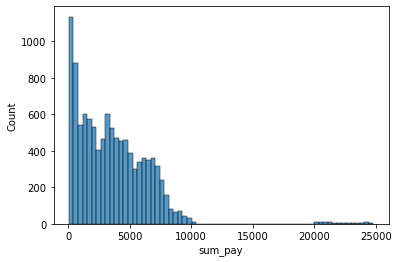

In [7]:
statistical_analysis(df1['sum_pay'],[0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995])

In [8]:
df1 = df1[df1['sum_pay']< 15000]

In [9]:
df1 = df1[df1['sum_pay']> 100]

In [10]:
df2_control = df1[df1['id_group'] == 'control']
df2_test = df1[df1['id_group'] == 'test']

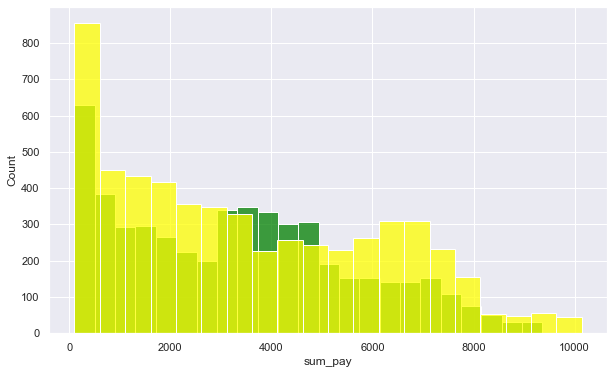

In [11]:
sns.set(rc={'figure.figsize': (10,6)})
ax1 = sns.histplot(df2_control['sum_pay'],color = 'green')
ax2 = sns.histplot(df2_test['sum_pay'],color = 'yellow')


In [12]:
from scipy.stats import t
from scipy.stats import ttest_ind, mannwhitneyu

In [13]:
def test_calc (r1,r2,alpha):
    s,p = ttest_ind(r1,r2)
    if p<alpha:
        answer = 'Средние значения в генеральных совокупностях, из кот. взяты данные, не равны'
    else:
        answer = 'Ср.знач.в ген. совокупностях, из которых взяты данные, равны'
    return print('t-критерий равен', s, ', p_value равно', p,'. При уровне значимости равном',alpha,answer)    
    
    
    

In [14]:
test_calc(df2_test['sum_pay'],df2_control['sum_pay'],0.01)

t-критерий равен 3.843604381831184 , p_value равно 0.00012193871556427206 . При уровне значимости равном 0.01 Средние значения в генеральных совокупностях, из кот. взяты данные, не равны


In [15]:
 def mann_whitney_func(r1,r2, alpha=0.05):
        s,p = mannwhitneyu(r1,r2)  
        if p<alpha:
            print('распределения не равны')
        else:
            print('распределения равны')
        return s,p    

In [16]:
mann_whitney_func(df2_test['sum_pay'],df2_control['sum_pay'],0.05)

распределения не равны


(14750609.5, 0.03988250594249283)

In [17]:
list_1=list()
list_1 = set(df1['id_point'])

In [18]:
df1['id_point'].unique()

array([1199., 1182., 1178., 1179., 1186., 1188.])

1186.0


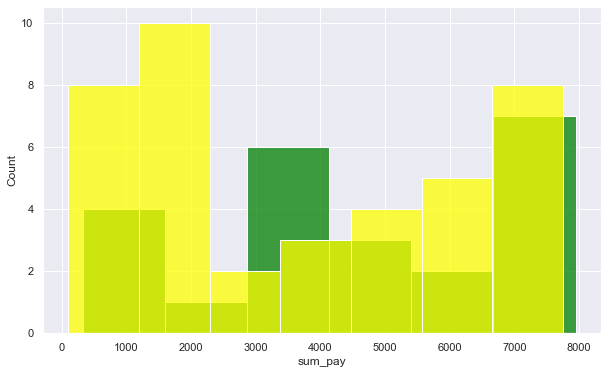

1188.0


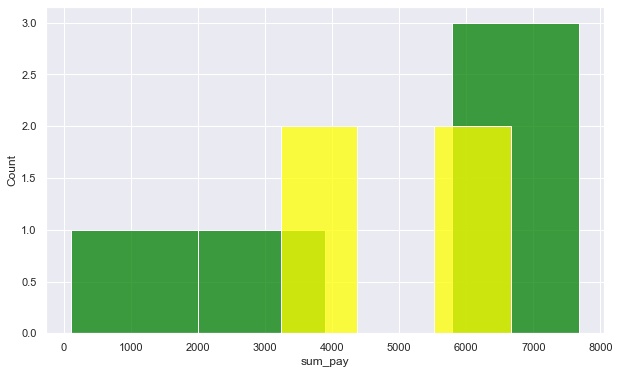

1199.0


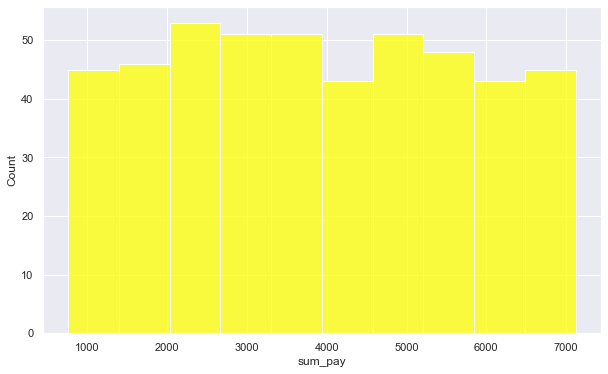

1178.0


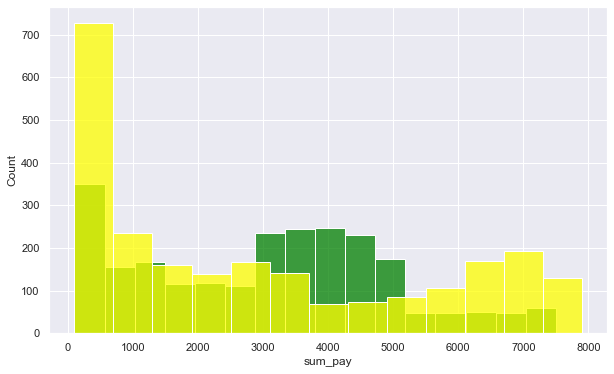

распределения не равны
t-критерий равен -1.3501847601997103 , p_value равно 0.17702042427785536 . При уровне значимости равном 0.05 Ср.знач.в ген. совокупностях, из которых взяты данные, равны
1179.0


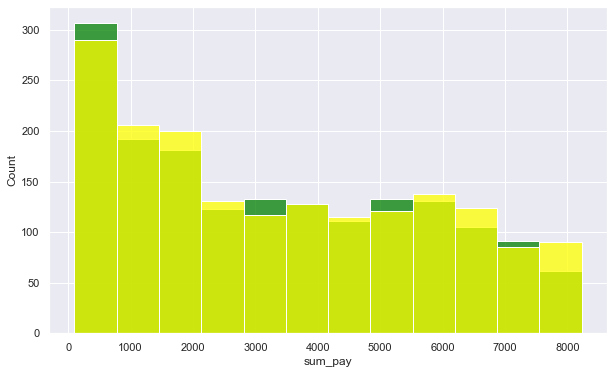

распределения равны
t-критерий равен 1.1225576641441302 , p_value равно 0.2617037465196552 . При уровне значимости равном 0.05 Ср.знач.в ген. совокупностях, из которых взяты данные, равны
1182.0


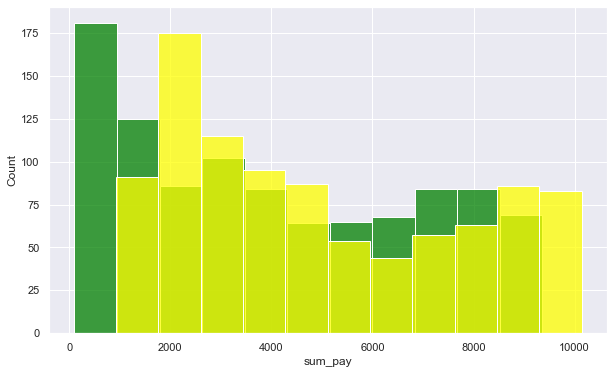

распределения не равны
t-критерий равен 7.172588995409098 , p_value равно 1.0387447468996453e-12 . При уровне значимости равном 0.05 Средние значения в генеральных совокупностях, из кот. взяты данные, не равны


In [20]:
for id_point in list_1:
    df2_control = df1[(df1['id_group'] == 'control') & (df1['id_point'] == id_point) ]
    df2_test = df1[(df1['id_group'] == 'test') & (df1['id_point'] == id_point) ]
    sns.set(rc={'figure.figsize': (10,6)})
    print(id_point)
    ax1 = sns.histplot(df2_control['sum_pay'],color = 'green')
    ax2 = sns.histplot(df2_test['sum_pay'],color = 'yellow')
    plt.show()
    if len(df2_control) > 100 and len(df2_test) > 100:
            mann_whitney_func(df2_test['sum_pay'], df2_control['sum_pay'],0.05)
            test_calc(df2_test['sum_pay'], df2_control['sum_pay'],0.05)

In [220]:
def plot_segment_distribution (df,segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['id_client'].count().reset_index()
        sns.catplot(x=segment,
                    y='id_client',
                    hue=test_factor,
                    data=aggregated_data,
                    kind='bar',
                    height=8,
                    aspect=2)

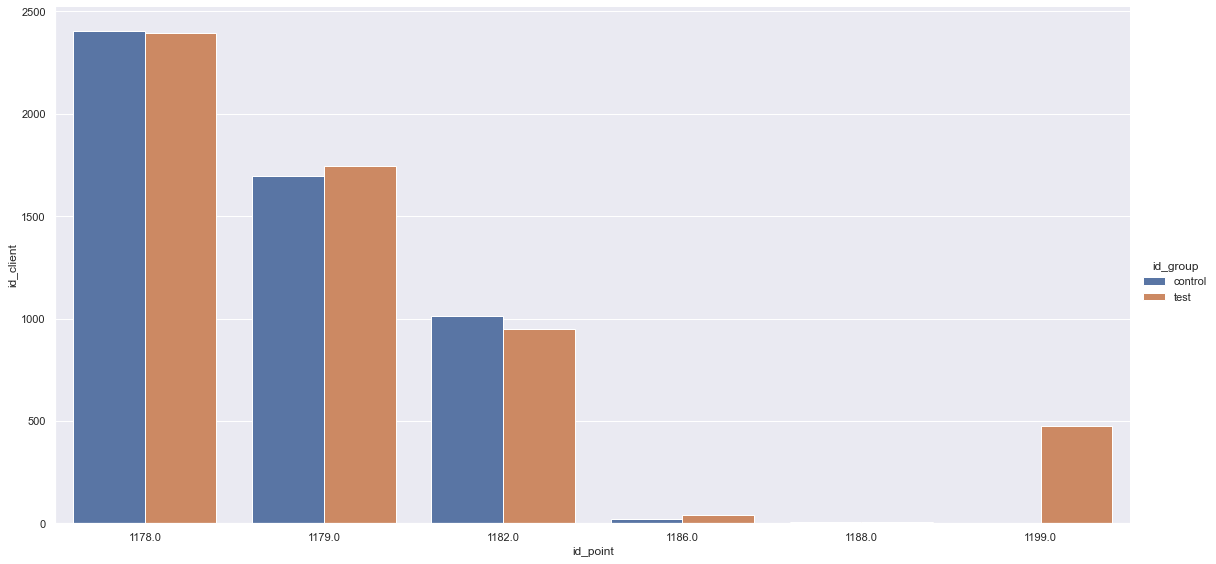

In [218]:
 plot_segment_distribution(df1,['id_point'],'id_group')

In [298]:
from scipy.stats import pearsonr, spearmanr

In [299]:
def  proxi_ranges (r1, r2, alpha=0.05):
     
     cov_matrix = np.cov(r1,r2)
     pearson_v,pearson_p=pearsonr(r1,r2)
     spearman_v,spearman_p=spearmanr(r1,r2) 
        
     print("Дисперсия ряда",r1.name," = ",cov_matrix[0,0])   
     print("Дисперсия ряда",r2.name," = ",cov_matrix[1,1])
     print("Ковариация = ",cov_matrix[0,1]) 
     print()
        
     if pearson_p < alpha:
        print("Корреляция Пирсона равна",pearson_v)
        if abs(pearson_v) < 0.3:
            print("Корреляция Пирсона слабая")
        elif abs(pearson_v) > 0.7:
            print("Корреляция Пирсона средняя")
        else:
            print("Корреляция Пирсона сильная")
     else:
        print("Корреляция Пирсона равна 0")
     print()   
            
     if spearman_p < alpha:
        print("Корреляция Спирмана равна",pearson_v)
        if abs(spearman_v) < 0.3:
            print("Корреляция Спирмана слабая")
        elif abs(spearman_v) > 0.7:
            print("Корреляция Спирмана средняя")
        else:
            print("Корреляция Спирмана сильная")
     else:
        print("Корреляция Спирмана равна 0")
     print()   

In [301]:
proxi_ranges (df1['sum_pay'],df1['months_reg'],0.05)

Дисперсия ряда sum_pay  =  6019043.352509183
Дисперсия ряда months_reg  =  10.034806895194142
Ковариация =  4657.337888360845

Корреляция Пирсона равна 0.5992658113811703
Корреляция Пирсона сильная

Корреляция Спирмана равна 0.5992658113811703
Корреляция Спирмана сильная



C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sum_pay', ylabel='months_reg'>

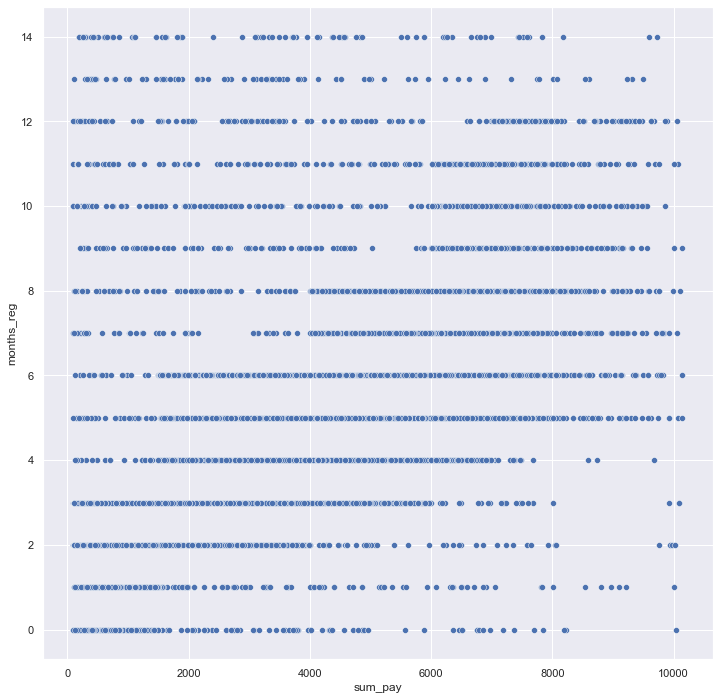

In [303]:
plt.figure(figsize=(12,12))
sns.scatterplot(df1['sum_pay'],df1['months_reg'],)